# SkillScanner

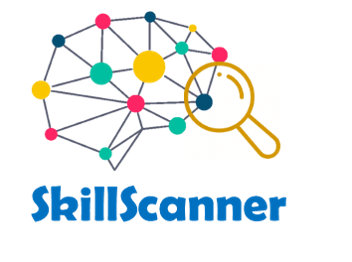

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SkillScanner" data-toc-modified-id="SkillScanner-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SkillScanner</a></span></li><li><span><a href="#Preamble" data-toc-modified-id="Preamble-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preamble</a></span></li><li><span><a href="#Project-Overview" data-toc-modified-id="Project-Overview-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Project Overview</a></span></li><li><span><a href="#Technology-Stack" data-toc-modified-id="Technology-Stack-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Technology Stack</a></span></li><li><span><a href="#Import-required-libraries" data-toc-modified-id="Import-required-libraries-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Import required libraries</a></span></li><li><span><a href="#Data-mining" data-toc-modified-id="Data-mining-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data mining</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Preamble

Back in 2012, Harvard Business Review declared: [“Data Scientist: The Sexiest Job of the 21st Century.”](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century). But a decade later, [is Data Scientist Still the Sexiest Job of the 21st Century?](https://hbr.org/2022/07/is-data-scientist-still-the-sexiest-job-of-the-21st-century)

Data Science jobs are more in demand than ever, and will experience more growth than almost any other field between now and 2029, since Artificial Intelligence (AI) is increasingly popular in business, and companies of all sizes and locations need data scientists to develop AI models. 

The assumption in 2012 was that data scientists could do all required tasks in a data science application — from conceptualizing the use case, to interfacing with business and technology stakeholders, to developing the algorithm and deploying it into production. However, due to the fact that no single job role can possess all the skills needed to successfully deploy a complex AI or analytics system, there has been a **proliferation of related jobs** to handle many of those tasks, including machine learning engineer, data engineer, AI specialist, analytics, etc., **leading to some confusion on the scope and responsibilities for each job role**, since all roles combine mathematical and statistical techniques with some empirical research and programming methods to analyze large data sets, obtain insights on patterns, and make predictions for future trends, risks, or investment opportunities.

As a result of this proliferation of skills, companies need to identify the different roles and skills required to effectively deploy data science models in their businesses.

# Project Overview

In this project, we studied the skills for the three most in demand job roles that have emerged in the recent years across data industry, with the following objectives:

1. Identify each role skills, which will serve as input for the supervised classification algorithms.
    * Data Analysis
    * Data Science
    * Data Engineering

2. Provide data-driven insights by means of Exploratory Data Analysis.

3. Build Machine Learning models to make a prediction of how a profile fits in each of the job roles.

4. Develop a product that is able to: 
    * Scan the skills from a given Linkedin profile.
    * Identify in-demand skills in Data industry.
    * Predict how this profile fits in each of the 3 job roles.  
    
The predictions are made based on Machine Learning models, which can generate predictions by using skills data extracted from Linkedin and job announcements posted by employers in Glassdoor. 

Considering that Supervised Learning techniques are used in classification models, and among the several algorithms for supervised classification of texts, the following algorithms were used to build the prediction models:
* Logistic Regression
* KNN (K-Nearest Neighbors)
* PCA (Principal Component Analysis) + Logistic Regression
* Ensemble methods:
  * Random Forest 
  * Gradient Boosting Trees:
      * Gradient Boosting Classifier
      * XGBoost

# Technology Stack

* Programming Language:
    * Python
* General libraries:
    * Numpy
    * Pandas
    * Pickle
    * Regex
    * BeautifulSoup
* Data collection:
    * API REST - Linkedin
    + Web Scrapping - Glassdoor
* EDA & Visualization: 
    * Pandas Profiling
    * Plotly Express
    * Dash
* Predictive Modeling
    * Scikit-Learn

# Import required libraries

In [1]:
# General libraries
import warnings
warnings.filterwarnings("ignore")
from linkedin_api import Linkedin
import pandas as pd
import pickle

# Functions
import Main_functions as functions
%reload_ext autoreload
%autoreload 2

# EDA
import plotly.express as px

# Data mining

By using an [API REST](https://github.com/tomquirk/linkedin-api), we will search profiles in Linkedin for each Data job role, to obtain a list of most popular skills and qualifications in the sector.

In [2]:
# API authentication:
mail = open('LinkedIn.txt').readlines()[0].split()[0]
password = open('LinkedIn.txt').readlines()[1]
api = Linkedin(f'{mail}',f'{password}')

In [4]:
# Making API request to search people profiles in Linkedin from some of the top companies:
jobs1= pd.json_normalize(api.search_people(keyword_title = 'Data', keyword_company='amazon'))
jobs2 = pd.json_normalize(api.search_people(keyword_title = 'Data', keyword_company='Accenture'))
jobs3 = pd.json_normalize(api.search_people(keyword_title = 'Data', keyword_company='tata consultancy services'))
jobs4 = pd.json_normalize(api.search_people(keyword_title = 'Data', keyword_company='Microsoft'))
jobs5 = pd.json_normalize(api.search_people(keyword_title = 'Data', keyword_company='Deloitte'))
jobs6 = pd.json_normalize(api.search_people(keyword_title = 'Data', keyword_company='IBM'))
jobs7 = pd.json_normalize(api.search_people(keyword_title = 'Data', keyword_company='Google'))
jobs8 = pd.json_normalize(api.search_people(keyword_title = 'Data', keyword_company='Cognizant'))
jobs9 = pd.json_normalize(api.search_people(keyword_title = 'Data', keyword_company='amazon web services'))
jobs10 = pd.json_normalize(api.search_people(keyword_title = 'Data', keyword_company='capgemini'))

In [5]:
# Concatenate to get a single Dataframe: 
df= pd.concat([jobs1,jobs2, jobs3, jobs4, jobs5, jobs6, jobs7, jobs8, jobs9, jobs10], axis= 0, ignore_index=True)
df

,urn_id,distance,public_id,tracking_id,jobtitle,location,name
0,ACoAACaB9m4BtkGspJhjbIEJTkxWHyIShvtWEeY,DISTANCE_2,jaime-miquel-llinas,646051438,Data Analyst at Amazon | Data Scientist | Civi...,"Barcelona, Catalonia, Spain",Jaime Miquel Llinas
1,ACoAAC5VKdMB_539tx8_af9g3U076cLcaxGa6is,DISTANCE_2,lucasaledi,777333203,Data Analyst @ Amazon,"Barcelona, Catalonia, Spain",Lucas Aledi
2,ACoAADMuPbUBMNPIoQyM1LPJzyYOppwj-uRok3s,DISTANCE_2,xavier-esteban,858668469,Data Analyst at Amazon,"Cardedeu, Catalonia, Spain",Xavier Esteban
3,ACoAABcvArEB_Zs2XfpLwR-VfuXo_Ynjjh-JENc,DISTANCE_2,carlesferreres,388956849,Data Scientist at Accenture AI,Spain,Carles Ferreres Vivero
4,ACoAAB84V2IB8XrZcb8ugpxbulbICCyNjjhwp8I,DISTANCE_2,quimarnau,523786082,Data Scientist at Accenture AI,"Barcelona, Catalonia, Spain",Quim Arnau
5,ACoAAB1isTcBXYbnpsL-IIOOuKmb0_cLhpSdhwk,DISTANCE_2,elio-abi-karam,493007159,Data Scientist at Accenture,"Barcelona, Catalonia, Spain",Elio Abi Karam
6,ACoAAAAMaGwBABTeVbdLYbSwAMrP33Fy6FfXCXM,DISTANCE_2,heleenwarbout,813164,SAP Architect Data Management at Tata Consulta...,"Dübendorf, Zurich, Switzerland",Heleen Marsili
7,ACoAAAsUNg8BLdFFCGmJ_I2nWC1HMpM_IkhgP48,DISTANCE_2,patrice-makosso-b272b952,185873935,Tata Consultancy Services - Talent Acquisition...,"Paris, Île-de-France, France",Patrice Makosso
8,ACoAAA0HFO8BDtrbGJYRRc4AmH2ERbl18pSqCcI,DISTANCE_2,shipra-katyayan-09324661,218567919,Data Analyst at Tata Consultancy Services,"Kolkata, West Bengal, India",Shipra Katyayan
9,ACoAAAH2tyYBwzKDx8d4PAsqSeKSR7ytyB0YK8U,DISTANCE_2,liananapalkova,32945958,Senior Data Scientist at Microsoft,Greater Barcelona Metropolitan Area,"Liana Napalkova, Ph.D."


In [ ]:
# Saving results in pickle and csv:
pd.to_pickle(df, "output/profiles_data.pkl")
df.to_csv('output/profiles_data.csv', index=False)

In [3]:
# Unpickle dataframe of profiles_data:
filename = 'output/profiles_data.pkl'
infile = open(filename,'rb')
profiles_data = pickle.load(infile)
infile.close()

In [4]:
# Filtering profiles located in United States
profiles_us = profiles_data[profiles_data['location'].str.contains('United States')]

# Number of rows and columns
print('Dataframe size: Number of rows = {0}; Number of Columns = {1}'.format(profiles_us.shape[0], profiles_us.shape[1]))

# Visualizing resulting dataframe
profiles_us.head()

Dataframe size: Number of rows = 1841; Number of Columns = 7


,urn_id,distance,public_id,tracking_id,jobtitle,location,name
16,ACoAABSCyOIBxsSHicBYBs90Tel8ys4VLBR4Z7w,DISTANCE_2,anunezmoros,344115426,Journalist | ML Data Linguist @Amazon/Alexa NLU,"New York, New York, United States",Adriana Nunez Moros
22,ACoAABijXZoBDMm71KGuzmhacg5HRIEg728cPTw,DISTANCE_2,adolforiveroll,413359514,Data Scientist 2 at Amazon,"Tempe, Arizona, United States",Adolfo Riveroll
25,ACoAAAsyOdYB1GLXMQRwUaNax7a9vf8FEceebIw,DISTANCE_2,nicholas-b-332aa852,187840982,Data Engineer at Amazon,"Seattle, Washington, United States",Nicholas B.
41,ACoAAAPkohcBE6WXMuJG1R_s_GkqZYbWmdnUbaM,DISTANCE_2,marta-fraga-cid-29ba5a19,65315351,"Head of Tech and Data Integration, Product Sus...","Golden, Colorado, United States",Marta Fraga Cid
42,ACoAAAeOHTQBJUspWHgxIZNrKx7msKOvv9XygR8,DISTANCE_2,iannacci,126754100,Data Scientist and Manager,"Seattle, Washington, United States",Francis Iannacci


In [12]:
# Saving results in pickle and csv:
pd.to_pickle(profile_us, "output/profiles_us.pkl")
profile_us.to_csv('output/profiles_us.csv', index=False)

In [13]:
# Unpickle dataframe of profiles_us:
filename = 'output/profiles_us.pkl'
infile = open(filename,'rb')
profiles_us = pickle.load(infile)
infile.close()

In [5]:
# Get skills for each Linkedin profile 'urn_id':
skills_people = functions.get_skills(profiles_us)

In [7]:
# API returns a list with sublists and nested dictionaries
# Before unnesting the list of skills we add a column to the dataframe to asign the list f skills of each profile
profiles_us['skills'] = skills_people

In [8]:
profiles_us

,urn_id,distance,public_id,tracking_id,jobtitle,location,name,skills
16,ACoAABSCyOIBxsSHicBYBs90Tel8ys4VLBR4Z7w,DISTANCE_2,anunezmoros,344115426,Journalist | ML Data Linguist @Amazon/Alexa NLU,"New York, New York, United States",Adriana Nunez Moros,"[{'name': 'Redes sociales'}, {'name': 'Periodi..."
22,ACoAABijXZoBDMm71KGuzmhacg5HRIEg728cPTw,DISTANCE_2,adolforiveroll,413359514,Data Scientist 2 at Amazon,"Tempe, Arizona, United States",Adolfo Riveroll,"[{'name': 'Microsoft Excel'}, {'name': 'Spanis..."
25,ACoAAAsyOdYB1GLXMQRwUaNax7a9vf8FEceebIw,DISTANCE_2,nicholas-b-332aa852,187840982,Data Engineer at Amazon,"Seattle, Washington, United States",Nicholas B.,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':..."
41,ACoAAAPkohcBE6WXMuJG1R_s_GkqZYbWmdnUbaM,DISTANCE_2,marta-fraga-cid-29ba5a19,65315351,"Head of Tech and Data Integration, Product Sus...","Golden, Colorado, United States",Marta Fraga Cid,"[{'name': 'User Experience'}, {'name': 'Analyt..."
42,ACoAAAeOHTQBJUspWHgxIZNrKx7msKOvv9XygR8,DISTANCE_2,iannacci,126754100,Data Scientist and Manager,"Seattle, Washington, United States",Francis Iannacci,"[{'name': 'Data Science'}, {'name': 'Machine L..."
...,...,...,...,...,...,...,...,...
8764,ACoAAAJsLNkBIErumj6Aclx-51Qr7njxKPcalTU,DISTANCE_3,anand-syril-87574011,40643801,Director - Insights & Data at Capgemini,United States,Anand Syril,"[{'name': 'Global Account Development'}, {'nam..."
8798,ACoAACI1O98BeD8m9VKeJXsnIKAggAsVUL7bwG4,DISTANCE_3,gulnar-albushova-253252140,573914079,Data analyst at Capgemini. Data Scientist who ...,United States,Gulnar Albushova,"[{'name': 'Microsoft Office', 'standardizedSki..."
8809,ACoAADUQ2fIB-rPM7fRoSR1F6quuOoOBZbDh9AE,DISTANCE_3,nicholas-perkins-0961aa20a,890296818,Data Analyst at Capgemini,"Irvine, California, United States",Nicholas Perkins,"[{'name': 'Engineering'}, {'name': 'English'},..."
8830,ACoAACqt-7YBmhF5D7ZED-4H8yxqUWsM-6cZ4c0,DISTANCE_3,aliyah-dumas,716045238,Data Analyst at Capgemini,United States,Aliyah Dumas,"[{'name': 'Java', 'standardizedSkillUrn': 'urn..."


In [9]:
# Creating a column to categorize all the profile into a label according their job title    
data_new = functions.create_category(profiles_us, 'jobtitle', 'Job_category')
data_new

,urn_id,distance,public_id,tracking_id,jobtitle,location,name,skills,Job_category
16,ACoAABSCyOIBxsSHicBYBs90Tel8ys4VLBR4Z7w,DISTANCE_2,anunezmoros,344115426,Journalist | ML Data Linguist @Amazon/Alexa NLU,"New York, New York, United States",Adriana Nunez Moros,"[{'name': 'Redes sociales'}, {'name': 'Periodi...",Data Scientist
22,ACoAABijXZoBDMm71KGuzmhacg5HRIEg728cPTw,DISTANCE_2,adolforiveroll,413359514,Data Scientist 2 at Amazon,"Tempe, Arizona, United States",Adolfo Riveroll,"[{'name': 'Microsoft Excel'}, {'name': 'Spanis...",Data Scientist
25,ACoAAAsyOdYB1GLXMQRwUaNax7a9vf8FEceebIw,DISTANCE_2,nicholas-b-332aa852,187840982,Data Engineer at Amazon,"Seattle, Washington, United States",Nicholas B.,"[{'name': 'SQL'}, {'name': 'Python'}, {'name':...",Data Engineer
41,ACoAAAPkohcBE6WXMuJG1R_s_GkqZYbWmdnUbaM,DISTANCE_2,marta-fraga-cid-29ba5a19,65315351,"Head of Tech and Data Integration, Product Sus...","Golden, Colorado, United States",Marta Fraga Cid,"[{'name': 'User Experience'}, {'name': 'Analyt...",NaN
42,ACoAAAeOHTQBJUspWHgxIZNrKx7msKOvv9XygR8,DISTANCE_2,iannacci,126754100,Data Scientist and Manager,"Seattle, Washington, United States",Francis Iannacci,"[{'name': 'Data Science'}, {'name': 'Machine L...",Data Scientist
...,...,...,...,...,...,...,...,...,...
8764,ACoAAAJsLNkBIErumj6Aclx-51Qr7njxKPcalTU,DISTANCE_3,anand-syril-87574011,40643801,Director - Insights & Data at Capgemini,United States,Anand Syril,"[{'name': 'Global Account Development'}, {'nam...",NaN
8798,ACoAACI1O98BeD8m9VKeJXsnIKAggAsVUL7bwG4,DISTANCE_3,gulnar-albushova-253252140,573914079,Data analyst at Capgemini. Data Scientist who ...,United States,Gulnar Albushova,"[{'name': 'Microsoft Office', 'standardizedSki...",Data Scientist
8809,ACoAADUQ2fIB-rPM7fRoSR1F6quuOoOBZbDh9AE,DISTANCE_3,nicholas-perkins-0961aa20a,890296818,Data Analyst at Capgemini,"Irvine, California, United States",Nicholas Perkins,"[{'name': 'Engineering'}, {'name': 'English'},...",Data Analyst
8830,ACoAACqt-7YBmhF5D7ZED-4H8yxqUWsM-6cZ4c0,DISTANCE_3,aliyah-dumas,716045238,Data Analyst at Capgemini,United States,Aliyah Dumas,"[{'name': 'Java', 'standardizedSkillUrn': 'urn...",Data Analyst


In [10]:
#Checking the distribution of the data per job category
profiles_us.groupby('Job_category')['urn_id'].count().to_frame()

,urn_id
Job_category,
Data Analyst,173
Data Engineer,233
Data Scientist,1335


In [11]:
# Visualize null values
profiles_us['Job_category'].isna().sum()

100

In [12]:
# Separate the job category and skills data in 3 new dataframe per category 
skills_science = profiles_us[profiles_us['Job_category']== 'Data Scientist'][['Job_category', 'skills']]
skills_analysis = profiles_us[profiles_us['Job_category']== 'Data Analyst'][['Job_category', 'skills']]
skills_engineer = profiles_us[profiles_us['Job_category']== 'Data Engineer'][['Job_category', 'skills']]

In [13]:
# Since the API returns the skills as a list with sublists and nested dictionaries
# we will unnest it with following function to extract all the skills in a single list for each category
# create new dataframes with the category and the skills for each one

list_of_skills = ['Python', 'SQL', 'Statistics', 'Machine Learning', 'PowerPoint',  'ETL', 'Analy', 'NLP', 'AWS', 'Spark', 'Hadoop']

top_skills_science = functions.top_skills_category(skills_science, 'Data Science', list_of_skills)
top_skills_analysis = functions.top_skills_category(skills_analysis, 'Data Analysis', list_of_skills)
top_skills_engineer = functions.top_skills_category(skills_engineer, 'Data Engineer', list_of_skills)

In [14]:
# Merging the dataframes into one 
skills_df2 = pd.merge(top_skills_science, top_skills_analysis, left_index=True,right_index=True, how="outer")
skills_data = pd.merge(skills_df2, top_skills_engineer, left_index=True,right_index=True, how="outer")

# Results

This output of skills_data will serve us as guide for feature encoding stage during prediction models building.

In [ ]:
# Resulting dataframe with Top50 skills per job category for profiles_us
pd.set_option('display.max_rows', 1000)
skills_data

,Data Science,Data Analysis,Data Engineer
AWS,229.0,23.0,150.0
Agile Methodologies,NaN,15.0,44.0
Algorithms,230.0,NaN,NaN
Amazon Redshift,NaN,NaN,33.0
Analy,2820.0,381.0,431.0
Big Data,166.0,17.0,58.0
Business Intelligence,115.0,22.0,63.0
Business Intelligence (BI),NaN,21.0,NaN
C,244.0,26.0,44.0
C (Programming Language),NaN,21.0,NaN


In [ ]:
# Saving results in pickle and csv:
pd.to_pickle(skills_data, "output/skills_data_var.pkl")
skills_data.to_csv('output/skills_data_var.csv', index=False)

In [ ]:
# checking total number of skills in rows
skills_data.shape

(80, 3)

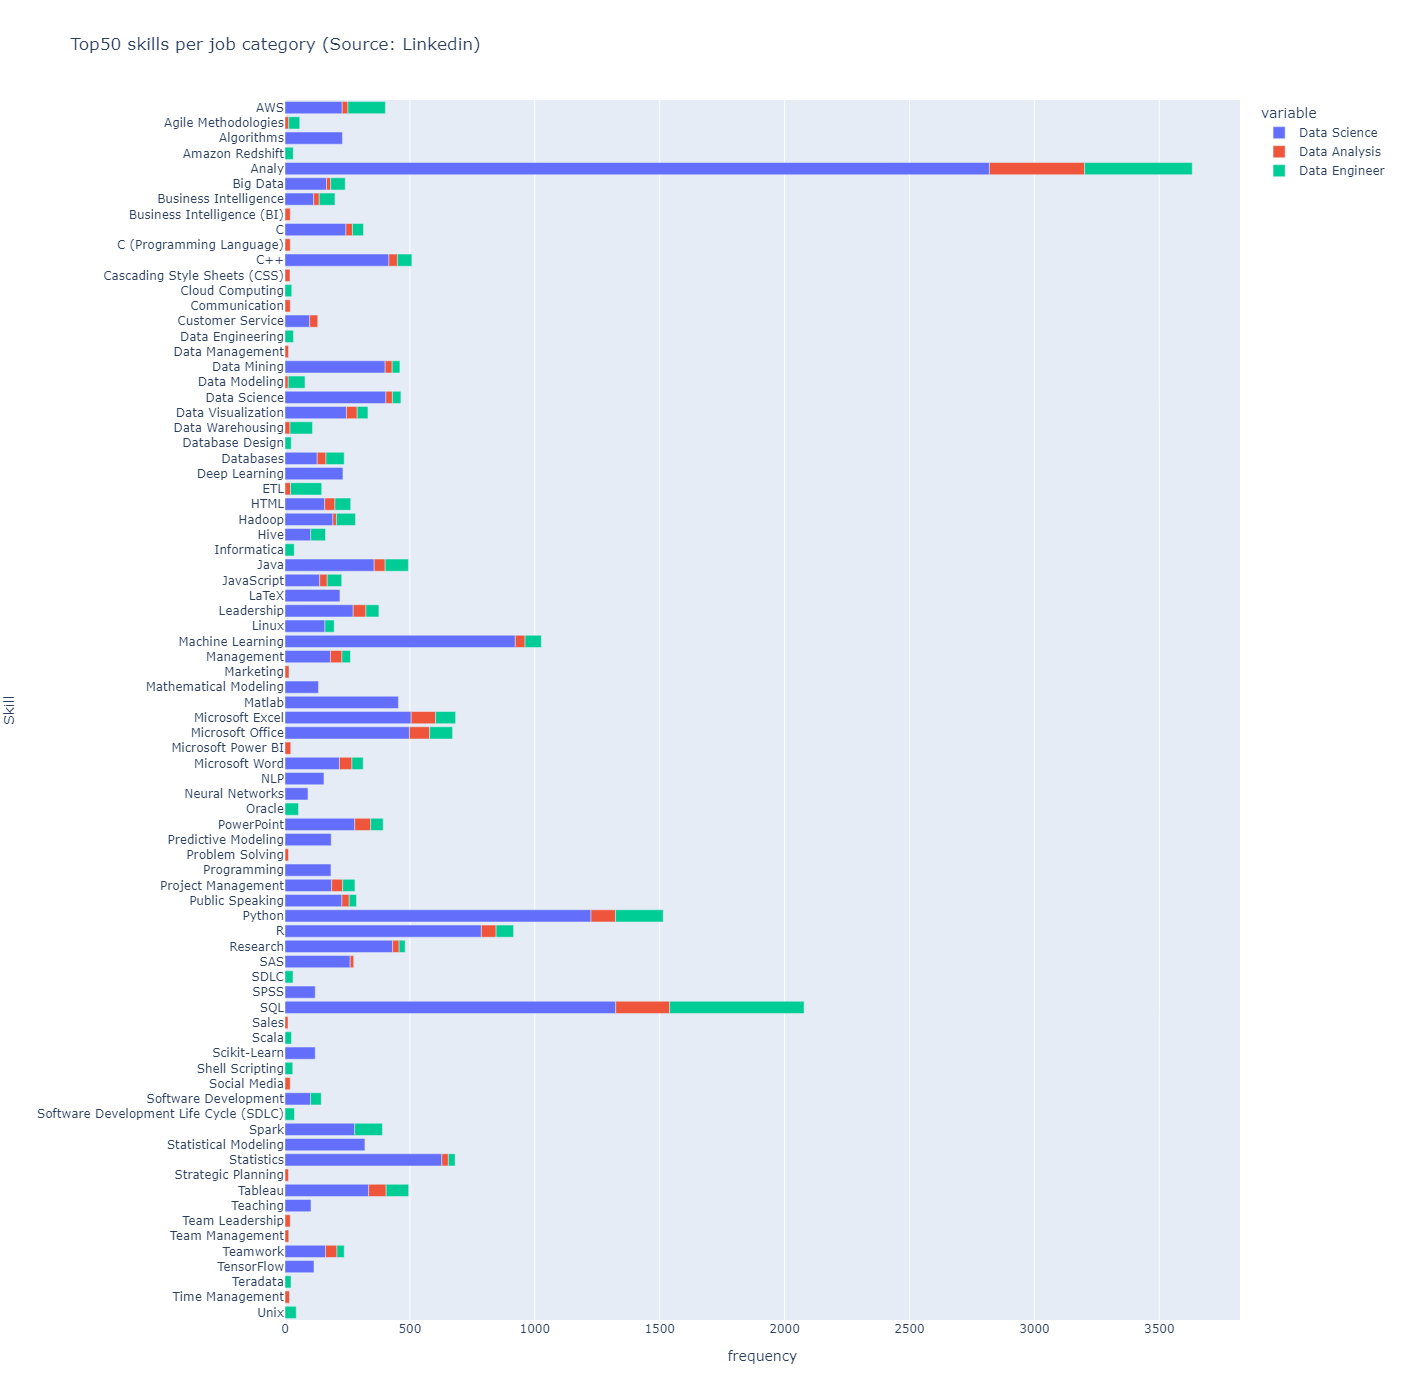

In [ ]:
# Plotting skills_data in bar chart
fig_skills_data = px.bar(data_frame=skills_data,
                   y = skills_data.index,
                   x = skills_data.columns, 
                   title='Top50 skills per job category (Source: Linkedin)',
                   labels={'index': 'Skill', 'value': 'frequency'},
                   width=1200,
                   height=1400)
fig_skills_data['layout']['yaxis']['autorange'] = "reversed"
fig_skills_data.show()

# Conclusions

- From 1841 data profiles scrapped in Linkedin, the API returned 73% of Data Scientist profiles. 
- After Top50 skills per each job category were extracted, we got a total of 80 different skills.
- Most common 5 skills among all profiles are: Analytics, SQL, Python, Machine Learning, R.